# Jugo project

## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn
from sklearn.metrics import classification_report

## Weather data
The weather data that is imported here is taken from the **WeatherDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a description about the different column name meanings.

In [2]:
df = pd.read_csv("datasets/CleanWeather.csv")
df.sample(3)

,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
11531955,2005-09-11,257,21,40.929202,40.170698,62.222465,171.0,0.0,0.00000,63.489610,0.0,0.0,0.0,0.0,0.0,9,Summer,1
175309,1952-06-25,380,20,46.000000,51.000000,66.706150,163.0,0.0,0.83167,63.296556,0.0,1.0,0.0,0.0,0.0,6,Spring,0
346241,1953-11-16,310,5,31.000000,31.000000,81.037315,74.0,0.0,0.83167,50.404950,0.0,0.0,0.0,0.0,0.0,11,Autumn,0


In [3]:
df.shape

(19188675, 18)

It can be concluded that the file got imported correctly and is ready to be used further.

## Traffic data
The traffic data that is imported here is taken from the **TrafficDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a data dictionary with data requirements. 

In [4]:
traffic_data = pd.read_csv("datasets/CleanTraffic.csv")
traffic_data.sample(3)

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
1123452,1959028,2016-06-03,2016-06-03,15:58:00,17:06:28,247.650,3617.089,68.467,52.4,48.4,...,Ongeval(len),"[Geen oorzaakcode opgegeven door VWM 10], [Ong...","[000], [ACI], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2016-06-03 15:58:00,2016-06-03 17:06:28
1531009,2197844,2017-08-21,2017-08-21,17:11:00,17:14:47,7.567,2000.000,3.783,21.0,19.0,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 4],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2017-08-21 17:11:00,2017-08-21 17:14:47
1395648,2089089,2017-01-16,2017-01-16,7:57:00,8:54:43,183.083,3172.105,57.717,86.3,89.3,...,Ongeval (met opruim/berging),"[Geen oorzaakcode opgegeven door VWM 20], [Ong...","[000], [ACI], [OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2017-01-16 07:57:00,2017-01-16 08:54:43


In [5]:
traffic_data.shape

(1581413, 28)

It can be concluded that the file got imported correctly and is ready to be used further.

## Weather stations data
The traffic data that is imported here is taken from the **WeatherStations&InitialEDA** file, where detailed steps about the cleaning of the dataset have been specified as well as a short data exploration.

### Importing the data and checking its quality

In [6]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

,STN,LON(east),LAT(north),ALT(m),NAME
0,209,4.518,52.465,0.0,IJmond
1,210,4.430,52.171,-0.2,Valkenburg Zh
2,215,4.437,52.141,-1.1,Voorschoten
3,225,4.555,52.463,4.4,IJmuiden
4,235,4.781,52.928,1.2,De Kooy


In [7]:
weather_stations.shape

(50, 5)

In [8]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [9]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data and the data types are correct. The rest of the exloration and cleaning of this dataset can be found in the **WeatherStations&InitialEDA** file. Therefore, it can be concluded that the data can be used further.

### Relevant weather stations
It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [10]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:2]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km
Station ID: 370, Distance: 27.93 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km
Station ID: 377, Distance: 23.30 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km
Station ID: 391, Distance: 23.77 km



# Data joining
## Data preparation for performing a left join between the weather dataset and the traffic dataset
### Weather data

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from the stations of interest. 

In [11]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 370, 375, 377, 380, 391}

Apart from the weather stations, another important factor for the join is the date. We want to make sure that the dates in both dataset start and end at the same time.

In [12]:
print("Traffic data start:", traffic_data['StartDate'].min())
print("Traffic data end:", traffic_data['StartDate'].max())
print("Weather data start:", df['Date (YYYY-MM-DD)'].min())
print("Weather data end:", df['Date (YYYY-MM-DD)'].max())

max_start_date = max(traffic_data['StartDate'].min(), df['Date (YYYY-MM-DD)'].min())
min_end_date = min(traffic_data['StartDate'].max(), df['Date (YYYY-MM-DD)'].max())
print("--------------------------------------")
print("Start date:", max_start_date)
print("End date:", min_end_date)

Traffic data start: 2015-01-01
Traffic data end: 2024-02-29
Weather data start: 1951-01-01
Weather data end: 2024-03-25
--------------------------------------
Start date: 2015-01-01
End date: 2024-02-29


In [13]:
filtered_weather_data = df[(df['Date (YYYY-MM-DD)'] >= max_start_date) & (df['Date (YYYY-MM-DD)'] <= min_end_date)]
print("Minimum date:", filtered_weather_data['Date (YYYY-MM-DD)'].min(), "and maximum date:", filtered_weather_data['Date (YYYY-MM-DD)'].max())

Minimum date: 2015-01-01 and maximum date: 2024-02-29


In [14]:
filtered_weather_data = filtered_weather_data[filtered_weather_data['Station ID'].isin(unique_ids)]
print(filtered_weather_data.shape)
filtered_weather_data.sample(3)

(481968, 18)


,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
16049103,2016-07-07,375,23,20.0,20.0,30.0,170.0,0.0,0.0,71.000000,0.0,0.0,0.0,0.0,0.0,7,Summer,1
18407405,2022-04-18,391,12,20.0,20.0,70.0,179.0,0.0,0.0,66.228304,0.0,0.0,0.0,0.0,0.0,4,Spring,1
16337188,2017-03-24,377,14,60.0,60.0,90.0,133.0,0.0,0.0,67.000000,0.0,0.0,0.0,0.0,0.0,3,Spring,1


After filtering for the relevant stations, we still have around half a million observations in the weather dataset.

In [15]:
hourlyobservations = filtered_weather_data.groupby(['Station ID', 'Date (YYYY-MM-DD)', 'Hour']).size()
hourlyobservations = hourlyobservations.reset_index(name='NumObs')
print("Min number of observations per hour:", hourlyobservations['NumObs'].min())
print("Max number of observations per hour:", hourlyobservations['NumObs'].max())

Min number of observations per hour: 1
Max number of observations per hour: 1


It seems that we have the weather indicators measured 1 time per hour in each relevant station. Therefore, we need to come up with a solution that would allow us to make sure that for each traffic jam we have weather data in place.

### Traffic data

It looks like there might be observations that contain traffic jams that continued from one day until the other. Therefore, when joining we need to carefully consider whether we want to join based on the start or end date and time.

In [16]:
traffic_data[traffic_data['StartDate'] != traffic_data['EndDate']] 

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
6536,3568729,2023-06-03,2023-06-04,23:52:22,0:31:03,111.825,2891.000,38.683,62.6,59.0,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 4], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-03 23:52:22,2023-06-04 00:31:03
11132,3571530,2023-06-05,2023-06-06,23:54:20,0:51:48,208.273,3624.000,57.467,55.1,50.1,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 10], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:54:20,2023-06-06 00:51:48
11133,3571532,2023-06-05,2023-06-06,23:59:20,1:34:20,264.233,2781.000,95.000,79.1,76.7,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 5], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:59:20,2023-06-06 01:34:20
13722,3576406,2023-06-07,2023-06-08,21:13:25,0:42:54,597.529,2852.000,209.483,44.1,41.3,...,Werkzaamheden (en file buiten spits zonder oor...,"[Geen oorzaakcode opgegeven door VWM 59], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 21:13:25,2023-06-08 00:42:54
14007,3576426,2023-06-07,2023-06-08,22:13:23,0:07:33,284.758,2494.000,114.167,15.4,12.8,...,File buiten spits zonder oorzaak (met werkzaam...,"[Geen oorzaakcode opgegeven door VWM 60], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 22:13:23,2023-06-08 00:07:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565809,2762411,2020-06-06,2020-06-07,23:52:00,0:45:47,161.350,3000.000,53.783,88.4,91.4,...,Ongeval (met ander incident),"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [N03]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-06 23:52:00,2020-06-07 00:45:47
1565832,2761918,2020-06-03,2020-06-04,23:46:00,0:27:21,123.900,2996.372,41.350,126.0,124.0,...,Ongeval(len),[Ongeval(len) 41],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-03 23:46:00,2020-06-04 00:27:21
1569022,2811903,2021-04-16,2021-04-17,21:32:00,0:07:07,456.083,2940.260,155.117,29.6,31.6,...,Werkzaamheden op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [N65], [RWK], [N60]",N60,Werkzaamheden op aansluitende weg,Werkzaamheden elders,Werkzaamheden,Aanleg en gepland onderhoud,2021-04-16 21:32:00,2021-04-17 00:07:07
1578595,2798351,2020-12-30,2020-12-31,18:57:00,1:16:19,1549.400,4084.714,379.317,95.3,93.3,...,Ongeval vrachtwagen (met spoedreparatie),"[Ongeval(len) 16], [Ongeval met vrachtwagen(s)...","[ACI], [ACH], [N32]",ACH,Ongeval met vrachtwagen(s),Ongeval vrachtwagen,Ongeval,Ongeval,2020-12-30 18:57:00,2020-12-31 01:16:19


To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [17]:
traffic_data['Hour'] = traffic_data['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_data

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.000,5.617,45.6,47.9,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06,16
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.000,14.533,31.4,28.2,...,[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01,16
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.000,1.600,166.5,169.7,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05,16
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.000,11.517,82.8,85.6,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00,16
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.000,9.517,144.3,140.6,...,[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581408,2756774,2020-04-10,2020-04-10,6:31:00,7:14:41,102.150,2338.421,43.683,52.3,50.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Opru...","[000], [CLE]",CLE,Opruimwerkzaamheden,Opruimwerkzaamheden,Incident (opruimwerkzaamheden),Incident,2020-04-10 06:31:00,2020-04-10 07:14:41,6
1581409,2756818,2020-04-10,2020-04-10,16:46:00,17:35:32,139.217,2810.565,49.533,146.2,144.2,...,"[Opruimingswerkzaamheden 46], [Eerder(e) ongev...","[OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-10 16:46:00,2020-04-10 17:35:32,16
1581410,2756726,2020-04-09,2020-04-09,14:14:00,14:17:40,7.333,2000.000,3.667,30.0,32.0,...,"[Geen oorzaakcode opgegeven door VWM 1], [Te h...","[000], [OHW], [000]",OHW,"Te hoog voertuig gesignaleerd, wordt afgehandeld",Hoogtemelding,Incident,Incident,2020-04-09 14:14:00,2020-04-09 14:17:40,14
1581411,2756735,2020-04-09,2020-04-09,16:03:00,16:15:27,25.900,2080.321,12.450,51.5,53.5,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2020-04-09 16:03:00,2020-04-09 16:15:27,16


#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.
An important observation is that **A2 leads from Sittard to 's-Hertogenbosch** and vice versa, whereas **A73 leads from Sittard to Boxmeer** and vice versa. Other routes are also possible, but they are significantly slower. Therefore, it is better to focus on those two only for now. Furthermore, they have been suggested by the client as the optimal routes.

In [18]:
denb=traffic_data[(traffic_data["MainRoadFrom"] == "'s-Hertogenbosch")&(traffic_data["MainRoadTo"] == "Utrecht")]
denb["HectometerDirection"].unique()

array(['aflopend'], dtype=object)

In [19]:
filtered_traffic= traffic_data[(traffic_data['RoadDescr'] == 'A73') | (traffic_data['RoadDescr'] == 'A2')]
filtered_traffic

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.000,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.000,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.000,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.000,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.000,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581317,2757675,2020-04-23,2020-04-23,12:12:00,12:32:56,57.350,2739.650,20.933,162.3,164.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Defe...","[000], [BKD], [000]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident,2020-04-23 12:12:00,2020-04-23 12:32:56,12
1581348,2757792,2020-04-24,2020-04-24,13:35:00,13:45:06,20.200,2000.000,10.100,219.2,221.2,...,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [000]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-24 13:35:00,2020-04-24 13:45:06,13
1581392,2756631,2020-04-08,2020-04-08,12:58:00,15:06:07,405.883,3168.076,128.117,90.6,92.6,...,"[Geen oorzaakcode opgegeven door VWM 3], [Opru...","[000], [OCL], [HBD], [OCL]",HBD,Defecte vrachtwagen(s),Defecte vrachtwagen,Incident (gestrand voertuig),Incident,2020-04-08 12:58:00,2020-04-08 15:06:07,12
1581397,2756680,2020-04-09,2020-04-09,6:25:00,6:31:41,13.367,2000.000,6.683,68.9,70.9,...,"[Ongeval(len) 5], [Eerder(e) ongeval(len) 2]","[ACI], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-09 06:25:00,2020-04-09 06:31:41,6


## Data joining
There are several types of joins:
* **Inner join** - An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.
* **Left (outer) join** - A left join returns a dataframe containing all the rows of the left dataframe. All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.
* **Right (outer) join** - A right join is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.
* **Semi-join** - A semi-join returns rows from the left table for which there are corresponding matching rows in the right table. Unlike regular joins which include the matching rows from both tables, a semi-join only includes columns from the left table in the result.
* **Anti-join** - An anti-join allows you to return all rows in one dataset that do not have matching values in another dataset. 
* **Full (outer) join** - A full join returns all those records which either have a match in the left or right dataframe. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

Sources:
* https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
* https://www.statology.org/pandas-anti-join/
* https://www.geeksforgeeks.org/difference-between-anti-join-and-semi-join/


#### Weather data and weather stations join

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

In [20]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data.sample(3)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
69047,356,5.146,51.859,0.7,Herwijnen,2022-11-16,356,1,40.0,40.0,...,8.0,52.024931,0.0,0.0,0.0,0.0,0.0,11,Autumn,3
104059,370,5.377,51.451,22.6,Eindhoven,2017-09-15,370,6,30.0,20.0,...,0.0,48.000000,0.0,0.0,0.0,0.0,0.0,9,Summer,1
275624,377,5.763,51.198,30.0,Ell,2018-12-14,377,16,20.0,20.0,...,0.0,58.000000,0.0,0.0,0.0,0.0,0.0,12,Autumn,1


### Left join

In [21]:
merged_left_test = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = "left")
nan_columns = merged_left_test.columns[merged_left_test.isna().any()]

print(merged_left_test[nan_columns].isna().sum())

TrafficJamNum          358950
StartDate              358950
EndDate                358950
StartTime              358950
EndTime                358950
Severity               358950
Length                 358950
Duration               358950
HectometerStart        358950
HectometerEnd          358950
RoadLetter             358950
RoadNumber             358950
RoadDescr              358950
HectometerDirection    358950
RoadSectionFrom        358950
RoadSectionTo          358950
MainRoadFrom           358950
MainRoadTo             358950
CauseCodeDescr         358950
CauseClass             358950
CauseCodeClass         358950
CauseCode              358950
Cause_1                358950
Cause_2                358950
Cause_3                358950
Cause_4                358950
StartDateTime          358950
EndDateTime            358950
dtype: int64


### New left join between Calendar and Traffic data
Since we noticed that not all of the dates and hours between 2015 and 2024 are present in the weather data, we decided to perform also another cleaner type of join: a left join between a calendar table, containing all of the days and hours between 1-1-2015 and the last date in the traffic dataset, and the traffic dataset itself. In this case, since the weather dataset did not provide a relevant correlation (linear or any other kind) we are not going to join it to this version of the code. More information about how the dataset was created can be observed in the traffic dataset.

In [22]:
leftnew = pd.read_csv("datasets/LeftJoin.csv")
leftnew.sample(5)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum
350839,2020-08-14,4,0.0,73.0,0.0
94970,2021-12-31,2,0.0,2.0,0.0
449814,2021-12-15,7,0.0,73.0,1.0
116055,2022-12-20,5,0.0,2.0,0.0
82002,2020-09-26,0,0.0,2.0,0.0


In [23]:
leftnew['StartDate'] = pd.to_datetime(leftnew['StartDate'])
leftnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476838 entries, 0 to 476837
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   StartDate               476838 non-null  datetime64[ns]
 1   Hour                    476838 non-null  int64         
 2   Duration                476838 non-null  float64       
 3   RoadNumber              476838 non-null  float64       
 4   HectometerDirectionNum  476838 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 18.2 MB


### Joining weather and traffic (using new left join)

In [24]:
a73stations = [375, 391, 380]
a2stations = [377, 370, 356]

# Filter the DataFrame for the relevant stations
a73_df = merged_weather_data[merged_weather_data['STN'].isin(a73stations)]
a2_df = merged_weather_data[merged_weather_data['STN'].isin(a2stations)]

# Group by 'StartDate' and 'Hour' for each station group and aggregate as needed
a73_grouped = a73_df.groupby(['Date (YYYY-MM-DD)', 'Hour']).agg({
    'Rainfall Indicator': 'mean',
    'Snow Indicator': 'mean', 
    'Ice Formation Indicator': 'mean',
    'Fog Indicator':'mean',
    'STN':'first'

}).reset_index()

a73_grouped['STN'] = 1

a2_grouped = a2_df.groupby(['Date (YYYY-MM-DD)', 'Hour']).agg({
    'Rainfall Indicator': 'mean',
    'Snow Indicator': 'mean', 
    'Ice Formation Indicator': 'mean',
    'Fog Indicator':'mean',
    'STN':'first'
}).reset_index()

a2_grouped['STN'] = 0

# Display the results
print("Grouped A73 Stations:")
print(a73_grouped['STN'].value_counts())

Grouped A73 Stations:
STN
1    80328
Name: count, dtype: int64


In [25]:
leftnew_a73 = leftnew[leftnew['RoadNumber'] == 73]
leftnew_a73.shape

(175683, 5)

In [26]:
leftnew_a2 = leftnew[leftnew['RoadNumber'] == 2]
leftnew_a2.shape

(301155, 5)

In [27]:
a73_grouped['Date (YYYY-MM-DD)'] = pd.to_datetime(a73_grouped['Date (YYYY-MM-DD)'])

traffic_and_weather_a73 = pd.merge(leftnew_a73, a73_grouped, left_on=['StartDate', 'Hour'], right_on=['Date (YYYY-MM-DD)', 'Hour'], how='left')

In [28]:
traffic_and_weather_a73.shape

(175683, 11)

In [29]:
a2_grouped['Date (YYYY-MM-DD)'] = pd.to_datetime(a2_grouped['Date (YYYY-MM-DD)'])

traffic_and_weather_a2 = pd.merge(leftnew_a2, a2_grouped, left_on=['StartDate', 'Hour'], right_on=['Date (YYYY-MM-DD)', 'Hour'], how='left')

In [30]:
traffic_and_weather_a2.shape

(301155, 11)

In [31]:
traffic_and_weather = pd.concat([traffic_and_weather_a2, traffic_and_weather_a73])
traffic_and_weather.shape

(476838, 11)

In [32]:
nan_columns = traffic_and_weather.columns[traffic_and_weather.isna().any()]

print(traffic_and_weather[nan_columns].isna().sum())

Date (YYYY-MM-DD)          13386
Rainfall Indicator         13386
Snow Indicator             13386
Ice Formation Indicator    13386
Fog Indicator              13386
STN                        13386
dtype: int64


In [33]:
traffic_and_weather['Rainfall Indicator'] = traffic_and_weather['Rainfall Indicator'].fillna(0) #this should be researched more in order to determine how to fill the missing vals
traffic_and_weather['Snow Indicator'] = traffic_and_weather['Snow Indicator'].fillna(0)
traffic_and_weather['Ice Formation Indicator'] = traffic_and_weather['Ice Formation Indicator'].fillna(0)
traffic_and_weather['Fog Indicator'] = traffic_and_weather['Fog Indicator'].fillna(0)

In [34]:
traffic_and_weather['Rainfall Indicator'].value_counts()

Rainfall Indicator
0.000000    350472
0.666667     64906
0.333333     61460
Name: count, dtype: int64

Assuming when the road is wet people drive slower, we would make all values above 0 to equal 1 for now.

In [35]:
traffic_and_weather['Rainfall Indicator'] = traffic_and_weather['Rainfall Indicator'].apply(lambda x: 1 if x > 0 else 0)
traffic_and_weather['Snow Indicator'] = traffic_and_weather['Snow Indicator'].apply(lambda x: 1 if x > 0 else 0)
traffic_and_weather['Ice Formation Indicator'] = traffic_and_weather['Ice Formation Indicator'].apply(lambda x: 1 if x > 0 else 0)
traffic_and_weather['Fog Indicator'] = traffic_and_weather['Fog Indicator'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
traffic_and_weather['Rainfall Indicator'].value_counts()

Rainfall Indicator
0    350472
1    126366
Name: count, dtype: int64

### Adding weather column representing clear, rainy, snow or both snow and rainy 
To be added: fog 

In [37]:
def combine_indicators(row):
    if row['Rainfall Indicator'] > 0 and row['Snow Indicator'] > 0:
        return 3  # Both rainfall and snowfall
    elif row['Snow Indicator'] > 0:
        return 2  # Snowfall only
    elif row['Rainfall Indicator'] > 0:
        return 1  # Rainfall only
    else:
        return 0  # clear sky

traffic_and_weather['WeatherIndicator'] = traffic_and_weather.apply(combine_indicators, axis=1)

In [38]:
traffic_and_weather['WeatherIndicator'].value_counts()

WeatherIndicator
0    348129
1    122691
3      3675
2      2343
Name: count, dtype: int64

In [39]:
#to be added another column for events maybe combining holidays
# also an idea - 1 column representing 0 no cause 1- weather cause 2- holiday, event cause. all causes should be present?

## Data preparation and preprocessing

### Creating a labels for the traffic duration - Weather left join

To classify traffic duration in an attempt to facilitate easier predicion, we will be assingning different labels to each record depending on the minutes spent in the traffic jam. Therefore, the categories will be named and assigned based on the following ranges:
* none - 0 minutes
* light - 15 minutes 
* medium - 30 minutes
* heavy - > 30 minutes    

In [40]:
#Define the bins and their labels
bins = [-np.inf, 0, 15, 30, np.inf]
labels = ['none', 'light', 'medium', 'heavy']

#Create the new column
merged_left_test['Duration Category'] = pd.cut(merged_left_test['Duration'].fillna(0), bins=bins, labels=labels)
traffic_and_weather['Duration Category'] = pd.cut(traffic_and_weather['Duration'].fillna(0), bins=bins, labels=labels)

#Replace NaN values with 'none' category
merged_left_test['Duration Category'].fillna('none', inplace=True)
traffic_and_weather['Duration Category'].fillna('none', inplace=True)

merged_left_test.head()

C:\Users\Ioana\AppData\Local\Temp\ipykernel_12860\969661509.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_left_test['Duration Category'].fillna('none', inplace=True)
C:\Users\Ioana\AppData\Local\Temp\ipykernel_12860\969661509.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,40.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,70.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none


In [41]:
#Define the mapping
category_mapping = {'none': 0, 'light': 1, 'medium': 2, 'heavy': 3}

#Apply the mapping to the 'Duration Category' column
merged_left_test['encoded_type'] = merged_left_test['Duration Category'].map(category_mapping)
traffic_and_weather['encoded_type'] = traffic_and_weather['Duration Category'].map(category_mapping)

#convert the 'encoded_type' column to integer
merged_left_test['encoded_type'] = merged_left_test['encoded_type'].astype(int)
traffic_and_weather['encoded_type'] = traffic_and_weather['encoded_type'].astype(int)

merged_left_test.sample(3)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type
894591,377,5.763,51.198,30.0,Ell,2021-05-31,377,22,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0
531858,375,5.707,51.659,22.0,Volkel,2016-05-17,375,5,20.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0
221493,356,5.146,51.859,0.7,Herwijnen,2023-07-28,356,14,50.0,50.0,...,[000],003,File buiten spits (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-07-28 14:22:27,2023-07-28 14:24:00,light,1


In [42]:
merged_left_test["Duration Category"].value_counts()

Duration Category
light     821166
none      358950
heavy     172854
medium    155166
Name: count, dtype: int64

In [43]:
traffic_and_weather["Duration Category"].value_counts()

Duration Category
none      285531
light     136657
heavy      28794
medium     25856
Name: count, dtype: int64

### Creating a labels for the traffic duration - Calendar left join

In [44]:
#Creating the new column
leftnew['Duration Category'] = pd.cut(leftnew['Duration'].fillna(0), bins=bins, labels=labels)
leftnew.head()

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Duration Category
0,2015-01-04,0,0.0,2.0,0.0,none
1,2015-01-04,1,0.0,2.0,0.0,none
2,2015-01-04,2,0.0,2.0,0.0,none
3,2015-01-04,3,0.0,2.0,0.0,none
4,2015-01-04,4,0.0,2.0,0.0,none


In [45]:
leftnew['encoded_type'] = leftnew['Duration Category'].map(category_mapping)
leftnew['encoded_type'] = leftnew['encoded_type'].astype(int)

leftnew.sample(5)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Duration Category,encoded_type
401976,2016-08-31,8,0.000,73.0,1.0,none,0
393639,2015-09-24,2,0.000,73.0,1.0,none,0
149807,2015-02-28,11,0.000,2.0,1.0,none,0
226969,2019-10-15,9,3.917,2.0,1.0,light,1
18283,2016-05-09,3,0.000,2.0,0.0,none,0


In [46]:
leftnew["Duration Category"].value_counts()

Duration Category
none      285531
light     136657
heavy      28794
medium     25856
Name: count, dtype: int64

In [47]:
merged_left_test['Duration Category'].value_counts()

Duration Category
light     821166
none      358950
heavy     172854
medium    155166
Name: count, dtype: int64

### Adding holidays, based on scraped data

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the range of years
start_year = 2015
end_year = 2024

# Create an empty list to store the scraped data
data = []

# Iterate over the years
for year in range(start_year, end_year + 1):
    # URL of the webpage containing the table for the current year
    url = f'https://www.timeanddate.com/holidays/netherlands/{year}?hol=9'

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the webpage
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table element with ID 'holidays-table'
        table = soup.find('table', id='holidays-table')

        # Check if the table is found
        if table:
            # Extract the table rows
            rows = table.find_all('tr')

            # Iterate over the rows and extract the data
            for row in rows:
                # Extract the table cells (columns) from each row
                cells = row.find_all(['th', 'td'])

                # Extract text from each cell and append it to the data list
                row_data = [cell.get_text(strip=True) for cell in cells]
                data.append([year] + row_data)  # Include the year as the first element
        else:
            print(f'Table with ID "holidays-table" not found for the year {year}.')
    else:
        print(f'Failed to retrieve webpage for the year {year}:', response.status_code)

# Create a DataFrame from the scraped data
columns = ['Year', 'Date', 'Day', 'Name', 'Type']
holiday = pd.DataFrame(data, columns=columns)
holiday = holiday.iloc[1:]

#Displaying the DataFrame
holiday.dropna().reset_index(drop=True)
holiday = holiday[holiday['Type']=='Public Holiday']
holiday = holiday[['Year', 'Date']]
holiday[['Day', 'Month']] = holiday['Date'].str.split(expand=True)
holiday['Month'].unique()

#Creating a month map
month_map = {
    'jan': '01', 'feb': '02', 'mrt': '03', 'apr': '04', 'mei': '05', 'jun': '06',
    'jul': '07', 'aug': '08', 'sep': '09', 'okt': '10', 'nov': '11', 'dec': '12'
}

#Mapping the 'Month' column to numerical values using the dictionary
holiday['Month'] = holiday['Month'].map(month_map)

#Making the day into two digits format
holiday['Day'] = holiday['Day'].astype(str).str.zfill(2)

#Assembling the date
holiday['Date'] = holiday['Year'].astype(str) + '-' + holiday['Month'] + '-' + holiday['Day']
holiday['Date'] = pd.to_datetime(holiday['Date'])
merged_left_test['Date (YYYY-MM-DD)'] = pd.to_datetime(merged_left_test['Date (YYYY-MM-DD)'])

#Dropping irrelevant information and assigning 1 to all rows with holidays
holiday = holiday.drop(columns=['Year', 'Day', 'Month'])
holiday['IsHoliday'] = 1

#Merging the data with the weather left join
merged_left_test = pd.merge(merged_left_test, holiday, left_on='Date (YYYY-MM-DD)', right_on='Date', how='left')

#Merging the data with the calendar left join
leftnew = pd.merge(leftnew, holiday, left_on='StartDate', right_on='Date', how='left')

# Fill missing values in 'IsHoliday' with 0 and drop the extra 'Date' column
merged_left_test['IsHoliday'] = merged_left_test['IsHoliday'].fillna(0).astype(int)
merged_left_test = merged_left_test.drop(columns=['Date'])

#Doing the same for the calendar left join
leftnew['IsHoliday'] = leftnew['IsHoliday'].fillna(0).astype(int)
leftnew = leftnew.drop(columns=['Date'])

In [49]:
leftnew.head(1)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Duration Category,encoded_type,IsHoliday
0,2015-01-04,0,0.0,2.0,0.0,none,0,0


### Adding football matches of FC Den Bosch that were in 's-Hertogenbosch from 2015 until the end of the 2023-24 season

The matches were scraped from Flashscore.

In [50]:
# Read match dates from match_dates.txt
with open('match_dates.txt', 'r', encoding='utf-8') as file:
    match_dates = file.readlines()
# Remove any extra whitespace or newline characters
match_dates = [date.strip() for date in match_dates]

# Read participants from participants.txt
with open('participants.txt', 'r', encoding='utf-8') as file:
    participants = file.readlines()
# Remove any extra whitespace or newline characters
participants = [participant.strip() for participant in participants]

# Create a DataFrame
football = pd.DataFrame({
    'Date': match_dates,
    'Team': participants
})

# Display the DataFrame
football

,Date,Team
0,10.05. 20:00,FC Eindhoven
1,03.05. 20:00,FC Den Bosch
2,26.04. 20:00,VVV-Venlo
3,19.04. 20:00,FC Den Bosch
4,15.04. 20:00,Jong Utrecht
...,...,...
435,29.08.2014,FC Den Bosch
436,25.08.2014,FC Emmen
437,22.08.2014,FC Den Bosch
438,15.08.2014,FC Den Bosch


In [51]:
# By browsig the scraped text files, I could see some dates were scraped improperly.
football['Date'] = football['Date'].str.replace('01.11.2023Na ET', '01.11.2023').str.replace('23.09.2015Na ET', '23.09.2015')

# Apart from 'FC Den Bosch', the team is also sometimes shown as 'FC Den Bosch (Ned)', which is when the match is friendly and the teams are often from different countries. We will fix this.
football['Team'] = football['Team'].str.replace('FC Den Bosch (Ned)', 'FC Den Bosch')

# The date of the matches played this year (first 19 rows) is displayed as mm.dd. hh:mm, while the dates before that are dd.mm.yyyy
# We need all dates as dd.mm.yyyy
football['Date'] = football['Date'].str.replace('10.05. 20:00', '10.05.2024').str.replace('03.05. 20:00', '03.05.2024').str.replace('26.04. 20:00', '26.04.2024').str.replace('19.04. 20:00', '19.04.2024').str.replace('15.04. 20:00', '15.04.2024').str.replace('08.04. 20:00', '08.04.2024').str.replace('29.03. 20:00', '29.03.2024').str.replace('23.03. 20:00', '23.03.2024').str.replace('15.03. 20:00', '15.03.2024').str.replace('08.03. 20:00', '08.03.2024').str.replace('04.03. 20:00', '04.03.2024').str.replace('27.02. 13:00', '27.02.2024').str.replace('23.02. 20:00', '23.02.2024').str.replace('16.02. 20:00', '16.02.2024').str.replace('11.02. 12:15', '11.02.2024').str.replace('02.02. 20:00', '02.02.2024').str.replace('26.01. 20:00', '26.01.2024').str.replace('19.01. 20:00', '19.01.2024').str.replace('15.01. 20:00', '15.01.2024')

# Finally, we will filter only for Team = FC Den Bosch (those are the games when Den Bosch were playing at home)
football = football[football['Team'] == 'FC Den Bosch']

# We are interested in the dates of those games, so we will make a subset with only the dates.
football_dates = football['Date']
football_dates = pd.to_datetime(football_dates, format='%d.%m.%Y')
football_dates = football_dates[football_dates.dt.year >= 2015]
football_dates = pd.DataFrame(football_dates)

In [52]:
football_dates['WeekdayyName'] = football_dates['Date'].dt.day_name()
football_dates

,Date,WeekdayyName
1,2024-05-03,Friday
3,2024-04-19,Friday
6,2024-03-29,Friday
8,2024-03-15,Friday
10,2024-03-04,Monday
...,...,...
410,2015-03-13,Friday
412,2015-02-27,Friday
416,2015-02-09,Monday
418,2015-01-23,Friday


In [53]:
football_dates.loc[(football_dates['WeekdayyName']=='Saturday')|(football_dates['WeekdayyName']=='Sunday'), 'Hour'] = 2
football_dates["Hour"] = football_dates["Hour"].fillna(7)
football_dates['IsMatch'] = 1
football_dates['MainRoadTo'] = "'s-Hertogenbosch"
football_dates['MainRoadFrom'] = "'s-Hertogenbosch"
football_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 1 to 419
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          207 non-null    datetime64[ns]
 1   WeekdayyName  207 non-null    object        
 2   Hour          207 non-null    float64       
 3   IsMatch       207 non-null    int64         
 4   MainRoadTo    207 non-null    object        
 5   MainRoadFrom  207 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 11.3+ KB


In [54]:
merged_left_test = pd.merge(merged_left_test, football_dates, left_on=['Date (YYYY-MM-DD)', 'MainRoadTo', 'Hour'], right_on=['Date', 'MainRoadTo', 'Hour'], how='left')
merged_left_test

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,Date,WeekdayyName,IsMatch,MainRoadFrom_y
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,40.0,40.0,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,70.0,70.0,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,70.0,70.0,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,70.0,80.0,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,60.0,60.0,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508131,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Hoge intensiteit,2024-02-29 09:15:29,2024-02-29 09:28:00,light,1,0,NaT,NaN,NaN,NaN
1508132,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Hoge intensiteit,2024-02-29 09:36:28,2024-02-29 09:42:00,light,1,0,NaT,NaN,NaN,NaN
1508133,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Hoge intensiteit,2024-02-29 09:03:29,2024-02-29 09:06:00,light,1,0,NaT,NaN,NaN,NaN
1508134,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Hoge intensiteit,2024-02-29 09:18:28,2024-02-29 09:25:03,light,1,0,NaT,NaN,NaN,NaN


In [55]:
columns_to_drop = ['MainRoadFrom_y', 'WeekdayyName', 'Date']
merged_left_test.drop(columns=columns_to_drop, inplace=True)

In [56]:
merged_left_test['IsMatch'] = merged_left_test['IsMatch'].fillna(0)
merged_left_test['IsMatch'].value_counts()

IsMatch
0.0    1507962
1.0        174
Name: count, dtype: int64

In [57]:
merged_left_test

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,IsMatch
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,40.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,70.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,70.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,60.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508131,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:15:29,2024-02-29 09:28:00,light,1,0,0.0
1508132,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:36:28,2024-02-29 09:42:00,light,1,0,0.0
1508133,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:03:29,2024-02-29 09:06:00,light,1,0,0.0
1508134,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,40.0,40.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:18:28,2024-02-29 09:25:03,light,1,0,0.0


Now, we will add a column called 'Matchday' to the merged data, which will have a value of 0 if there is no game on that day and 1 if there is.

In [58]:
# merged_left_test['Matchday'] = merged_left_test['Matchday'] = np.where(
#     (merged_left_test['Date (YYYY-MM-DD)'].isin(football_dates)) &
#     ((merged_left_test['MainRoadFrom'] == "'s-Hertogenbosch") | (merged_left_test['MainRoadTo'] == "'s-Hertogenbosch")),
#     1,
#     0
# )
# merged_left_test['Matchday'].value_counts()

### Adding road letter and number, based on station ID for days without traffic in the left weather join

In [59]:
a73stations = [375, 391, 380]
a2stations = [377, 370, 356]

#Fill RoadNumber with 73 where stn is 45 and RoadNumber is null
merged_left_test.loc[(merged_left_test['STN'].isin(a73stations)) & (merged_left_test['RoadNumber'].isnull()), 'RoadNumber'] = 73
# Fill RoadNumber with 2 where stn is 70 and RoadNumber is null
merged_left_test.loc[(merged_left_test['STN'].isin(a2stations)) & (merged_left_test['RoadNumber'].isnull()), 'RoadNumber'] = 2
merged_left_test.sample(2)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,IsMatch
163893,356,5.146,51.859,0.7,Herwijnen,2022-06-22,356,16,20.0,20.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-06-22 16:30:29,2022-06-22 16:32:00,light,1,0,0.0
351124,370,5.377,51.451,22.6,Eindhoven,2019-04-06,370,2,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,0,0.0


In [60]:
merged_left_test["RoadNumber"].isna().sum()

0

### Adding day of the week

In [61]:
#calendar left join
#Adding both weekday and weekday name columns for easier understanding
leftnew['WeekdayName'] = leftnew['StartDate'].dt.day_name()
leftnew['Weekday'] = leftnew['StartDate'].dt.weekday

In [62]:
#calendar left join
#Adding both weekday and weekday name columns for easier understanding
traffic_and_weather['WeekdayName'] = traffic_and_weather['StartDate'].dt.day_name()
traffic_and_weather['Weekday'] = traffic_and_weather['StartDate'].dt.weekday

In [63]:
#weather left join
merged_left_test['Date (YYYY-MM-DD)'] = pd.to_datetime(merged_left_test['Date (YYYY-MM-DD)'])
merged_left_test['WeekdayName'] = merged_left_test['Date (YYYY-MM-DD)'].dt.day_name()
merged_left_test['Weekday'] = merged_left_test['Date (YYYY-MM-DD)'].dt.weekday

#### Adding binary column representing if it is a weekend or weekday

In [64]:
import numpy as np

leftnew['IsWeekend'] = np.where(leftnew['Weekday'] >= 5, 1, 0)

### Adding season

In [65]:
def get_season_numerical(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn
    
merged_left_test['Season Numerical'] = merged_left_test['Date (YYYY-MM-DD)'].dt.month.apply(get_season_numerical)

#### For inner join

In [66]:
def get_season_numerical(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn
    
leftnew['Season Numerical'] = leftnew['StartDate'].dt.month.apply(get_season_numerical)

### Add a new column 'Week Number' containing the week number corresponding to each date

In [67]:
#Left weather
merged_left_test['WeekNumber'] = merged_left_test['Date (YYYY-MM-DD)'].dt.isocalendar().week
merged_left_test['WeekNumber'] = merged_left_test['WeekNumber'].astype(int)

In [68]:
#Left calendar
leftnew['WeekNumber'] = leftnew['StartDate'].dt.isocalendar().week
leftnew['WeekNumber'] = leftnew['WeekNumber'].astype(int)

### Adding day of the year

In [69]:
#left weather
merged_left_test['DayofYear'] = merged_left_test['Date (YYYY-MM-DD)'].dt.dayofyear

In [70]:
#left calendar
leftnew['DayofYear'] = leftnew['StartDate'].dt.dayofyear

In [71]:
#left calendar
traffic_and_weather['DayofYear'] = traffic_and_weather['StartDate'].dt.dayofyear

### Adding day of the month

In [72]:
#left weather
merged_left_test['DayofMonth'] = merged_left_test['Date (YYYY-MM-DD)'].dt.day

In [73]:
#left calendar
leftnew['DayofMonth'] = leftnew['StartDate'].dt.day

In [74]:
#left calendar
traffic_and_weather['DayofMonth'] = traffic_and_weather['StartDate'].dt.day

#### Adding month

In [75]:
leftnew['Month'] = leftnew['StartDate'].dt.month

### Adding year

In [76]:
#left weather
merged_left_test['Year'] = merged_left_test['Date (YYYY-MM-DD)'].dt.year

In [77]:
#left calendar
leftnew['Year'] = leftnew['StartDate'].dt.year

In [78]:
#left calendar
traffic_and_weather['Year'] = traffic_and_weather['StartDate'].dt.year

### Checking resulting dataframes

In [79]:
#left weather
merged_left_test.sample(5)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),...,encoded_type,IsHoliday,IsMatch,WeekdayName,Weekday,Season Numerical,WeekNumber,DayofYear,DayofMonth,Year
752560,375,5.707,51.659,22.0,Volkel,2024-02-20,375,17,60.0,80.0,...,1,0,0.0,Tuesday,1,0,8,51,20,2024
1083929,380,5.762,50.906,114.3,Maastricht,2018-06-12,380,17,20.0,20.0,...,1,0,0.0,Tuesday,1,2,24,163,12,2018
639282,375,5.707,51.659,22.0,Volkel,2020-12-26,375,13,70.0,80.0,...,0,1,0.0,Saturday,5,0,52,361,26,2020
215100,356,5.146,51.859,0.7,Herwijnen,2023-06-20,356,20,20.0,30.0,...,0,0,0.0,Tuesday,1,2,25,171,20,2023
1166895,380,5.762,50.906,114.3,Maastricht,2022-06-08,380,18,30.0,30.0,...,1,0,0.0,Wednesday,2,2,23,159,8,2022


In [80]:
#left calendar
leftnew.sample(5)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Duration Category,encoded_type,IsHoliday,WeekdayName,Weekday,IsWeekend,Season Numerical,WeekNumber,DayofYear,DayofMonth,Month,Year
309468,2015-12-15,17,0.00,73.0,0.0,none,0,0,Tuesday,1,0,0,51,349,15,12,2015
21875,2016-08-09,8,0.00,2.0,0.0,none,0,0,Tuesday,1,0,2,32,222,9,8,2016
407251,2017-04-04,16,0.00,73.0,1.0,none,0,0,Tuesday,1,0,1,14,94,4,4,2017
245494,2021-04-24,8,0.00,2.0,1.0,none,0,0,Saturday,5,1,1,16,114,24,4,2021
278632,2023-04-07,14,105.05,2.0,1.0,heavy,3,1,Friday,4,0,1,14,97,7,4,2023


In [81]:
leftnew["Duration Category"].value_counts()

Duration Category
none      285531
light     136657
heavy      28794
medium     25856
Name: count, dtype: int64

### Left weather downsampling

In [82]:
#left weather down sampling
desired_size_per_class = 155166

downsampled_data = pd.concat([merged_left_test[merged_left_test['Duration Category'] == label].sample(n=desired_size_per_class, replace=False)
                              for label in category_mapping])
print(downsampled_data.shape)
print(downsampled_data['Duration Category'].value_counts())

(620664, 62)
Duration Category
none      155166
light     155166
medium    155166
heavy     155166
Name: count, dtype: int64


In [83]:
#left calendar down sampling
desired_size_per_class = 136657
category_mapping = ['none', 'light', 'medium', 'heavy']
categories_to_downsample = category_mapping[:2]
downsampled_data = pd.concat([leftnew[leftnew['Duration Category'] == label].sample(n=desired_size_per_class, replace=False)
                              for label in categories_to_downsample])
remaining_data = leftnew[~leftnew['Duration Category'].isin(categories_to_downsample)]
downsampled_data = pd.concat([downsampled_data, remaining_data])

print(downsampled_data.shape)
print(downsampled_data['Duration Category'].value_counts())

(327964, 17)
Duration Category
none      136657
light     136657
heavy      28794
medium     25856
Name: count, dtype: int64


In [84]:
### Upsampling
max_count = leftnew['Duration Category'].value_counts().max()

# Upsampling the data 
upsampled_combined = leftnew.groupby('Duration Category', group_keys=False).apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)

# Checking the result
upsampled_counts = upsampled_combined['Duration Category'].value_counts()
upsampled_counts

C:\Users\Ioana\AppData\Local\Temp\ipykernel_12860\3183549441.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  upsampled_combined = leftnew.groupby('Duration Category', group_keys=False).apply(lambda x: x.sample(max_count, replace=True)).reset_index(drop=True)
C:\Users\Ioana\AppData\Local\Temp\ipykernel_12860\3183549441.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  upsampled_combined = leftnew.groupby('Duration Category', group_keys=False).apply(lambda x: x.sample(max_count, replace=True)).reset_inde

Duration Category
none      285531
light     285531
medium    285531
heavy     285531
Name: count, dtype: int64

# SMOTE upsampling over downsampled data to 'Light' category

In [98]:
from imblearn.over_sampling import SMOTE
patch_sklearn()

target = "encoded_type"
y = downsampled_data[target]

features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth', 'HectometerDirectionNum']
X = downsampled_data[features]

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit SMOTE to the data and resample
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled X and y into a DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=[target])], axis=1)

# Display the results
print(resampled_data[target].value_counts())

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


encoded_type
0    136657
1    136657
3    136657
2    136657
Name: count, dtype: int64


In [99]:
duration_category_map = {
    0: "None",
    1: "Light",
    2: "Medium",
    3: "Heavy"
}

# Add the new column 'Duration Category' using the map
resampled_data['Duration Category'] = resampled_data['encoded_type'].map(duration_category_map)

resampled_data

,Hour,RoadNumber,Weekday,DayofYear,Year,DayofMonth,HectometerDirectionNum,encoded_type,Duration Category
0,12,73.0,5,177,2021,26,0.000000,0,None
1,10,2.0,2,306,2022,2,1.000000,0,None
2,13,73.0,3,207,2018,26,1.000000,0,None
3,22,2.0,5,265,2018,22,0.000000,0,None
4,3,2.0,4,335,2017,1,1.000000,0,None
...,...,...,...,...,...,...,...,...,...
546623,17,2.0,2,149,2019,29,1.000000,3,Heavy
546624,17,2.0,3,315,2016,10,0.000000,3,Heavy
546625,16,2.0,6,151,2015,31,0.000000,3,Heavy
546626,17,2.0,1,340,2022,6,0.633189,3,Heavy


In [100]:
patch_sklearn()

target = "encoded_type"
y = resampled_data[target]

features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth', 'HectometerDirectionNum'] 
X = resampled_data[features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier on the modified training set
random_forest = RandomForestClassifier(max_depth=70, min_samples_leaf=1, min_samples_split=3, n_estimators=200, random_state=5)
random_forest.fit(X_train, y_train)

# Evaluate the model's performance on the testing set
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.6926531657611181


In [101]:
y_pred = random_forest.predict(X_test)

In [102]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     27352
           1       0.61      0.58      0.60     27190
           2       0.60      0.63      0.61     27575
           3       0.62      0.62      0.62     27209

    accuracy                           0.69    109326
   macro avg       0.69      0.69      0.69    109326
weighted avg       0.69      0.69      0.69    109326



### Evaluation

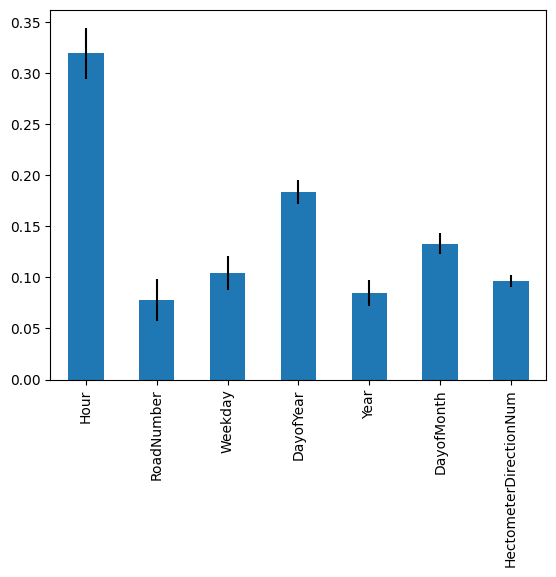

In [103]:
forest_importances = pd.Series(random_forest.feature_importances_, index=features)
standard_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
plt.figure()
forest_importances.plot.bar(yerr=standard_deviation)
plt.show()

In [92]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(random_forest, X_train, y_train, cv=skf, scoring='accuracy')# average accuracy score
print("Accuracy scores for each fold:", accuracy_scores)
average_accuracy = accuracy_scores.mean()
print("Average accuracy score:", average_accuracy)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy scores for each fold: [0.68397343 0.68127508 0.68486165 0.68209467 0.68350103]
Average accuracy score: 0.6831411725394221


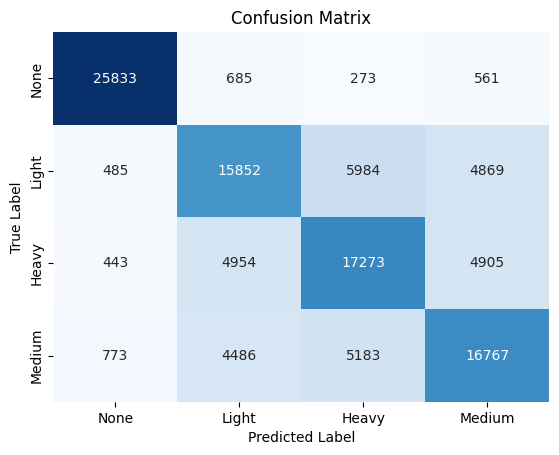

In [108]:
from sklearn.metrics import confusion_matrix

labels = resampled_data["Duration Category"].unique()

matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=None, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

We can see that the prediction is mainly relying on the `Hour` feature as it seems to contribute in proportion of about 90% to the final result. The other features are quite insignificant in comparison to this one. Let's inspect the relationship between the hour and the number of traffic jams:

### Making a real prediction for the duration category

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Function to preprocess the data
def preprocess_data(upsampled_combined, features, target):
    X = upsampled_combined[features].copy()
    y = upsampled_combined[target].copy()
    
    # Converting all features to integer (if they are not already)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
    
    # Encode 'RoadDescr' if it's not already numeric
    label_encoder = None
    if X['RoadNumber'].dtype == 'object':
        label_encoder = LabelEncoder()
        X['RoadNumber'] = label_encoder.fit_transform(X['RoadNumber'])
    
    return X, y, label_encoder

# Function to train the model
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    
    return model, label_encoder

# Function to make predictions with hardcoded input values
def predict_with_hardcoded_values(model, label_encoder=None):
    # Hardcoded input values
    input_data = pd.DataFrame({
        'Hour': [7],
        'RoadNumber': [1],
        'Weekday': [6],
        'DayofYear': [25],
        'Year': [2024],
        'DayofMonth': [1],
        'HectometerDirectionNum':[1]
    })

    
    # Ensuring all features are integer
    input_data = input_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
    
    # Making the prediction
    prediction = model.predict(input_data)
    
    # Visualizing the prediction
    print(f"Predicted Duration Category: {prediction[0]}")
    visualize_prediction(input_data, prediction[0])

# Function to visualize the input data and prediction
def visualize_prediction(input_data, prediction):
    fig, ax = plt.subplots()
    table_data = input_data.values[0]
    column_labels = input_data.columns.tolist()
    row_labels = ["Input Values"]
    
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=[table_data], colLabels=column_labels, rowLabels=row_labels, loc='center')
    ax.set_title(f'Predicted Duration Category: {prediction}', fontsize=14)
    
    plt.show()


Accuracy: 0.7082473234903086
Classification Report:
              precision    recall  f1-score   support

       heavy       0.64      0.64      0.64     56996
       light       0.61      0.54      0.57     57421
      medium       0.60      0.68      0.63     57125
        none       1.00      0.98      0.99     57114

    accuracy                           0.71    228656
   macro avg       0.71      0.71      0.71    228656
weighted avg       0.71      0.71      0.71    228656

Predicted Duration Category: none


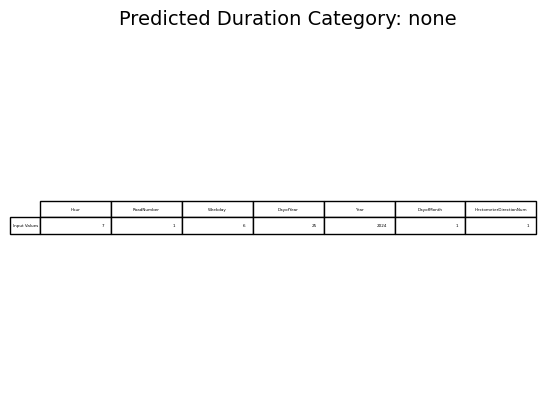

In [ ]:
features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth', 'HectometerDirectionNum']
target = "Duration Category"

# Preprocess the data
X, y, label_encoder = preprocess_data(upsampled_combined, features, target)

# Train the model
random_forest, label_encoder = train_model(X, y)

# Make predictions with hardcoded values
predict_with_hardcoded_values(random_forest, label_encoder)

#### Training the model without up or downsampling

In [ ]:
leftnewfiltered = leftnew[(leftnew["IsWeekend"]==0)&(leftnew["Hour"].isin([7, 8, 9, 16, 17, 18]))&(leftnew["IsHoliday"]==0)]
leftnewfiltered["Hour"].value_counts()

Hour
17    43359
16    38590
8     36015
7     26777
18    17765
9     16547
Name: count, dtype: int64

In [ ]:
# desired size per class
desired_size_per_class = 16547
# Sampling the data for each class to achieve the desired number of rows
downsampled_data = pd.concat([leftnewfiltered[leftnewfiltered['Duration Category'] == label].sample(n=desired_size_per_class, replace=False)
                              for label in category_mapping])
print(downsampled_data.shape)
print(downsampled_data['Duration Category'].value_counts())

(66188, 18)
Duration Category
none      16547
light     16547
medium    16547
heavy     16547
Name: count, dtype: int64


In [ ]:
patch_sklearn()

merged_data_sample = leftnewfiltered.copy() #.sample(n=100000, random_state=42) # sampling because it could not load

target = "encoded_type"
y = merged_data_sample[target]

features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth', 'HectometerDirectionNum']
X = merged_data_sample[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.7342715925274357

In [ ]:
predictions = random_forest.predict(X_test)
# Convert unique values to a list of strings
target_names = [str(label) for label in merged_data_sample["Duration Category"].unique()]
 
# Assuming predictions and y_test are your predicted and true labels
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

              precision    recall  f1-score   support

        none       0.92      0.91      0.91      7397
       light       0.73      0.93      0.81     21102
       heavy       0.17      0.05      0.07      3827
      medium       0.21      0.05      0.08      3890

    accuracy                           0.73     36216
   macro avg       0.50      0.48      0.47     36216
weighted avg       0.65      0.73      0.68     36216



### Support Vector Machines with downsampling

In [ ]:
# desired size per class
desired_size_per_class = 10000
# Sampling the data for each class to achieve the desired number of rows
downsampled_data = pd.concat([merged_left_test[merged_left_test['Duration Category'] == label].sample(n=desired_size_per_class, replace=False)
                              for label in category_mapping])
print(downsampled_data.shape)
print(downsampled_data['Duration Category'].value_counts())

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn
patch_sklearn()


merged_data_sample = downsampled_data.copy()

target = "encoded_type"
y = merged_data_sample[target]

#features = ['Hourly Average Wind Speed (m/s)','Highest Wind Gust (m/s) ', 'Temperature (0.1°C)', 'Hour']
features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth', 'HectometerDirectionNum']
X = merged_data_sample[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model finding accuracy
svc = SVC(kernel='rbf')

# Fit the model to the training data
svc.fit(X_train_scaled, y_train)

# Make predictions on the test data
svc_pred = svc.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_svc = accuracy_score(y_test, svc_pred)
print("Accuracy:", accuracy_svc)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.4927725404882765


### GBM with upsampling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
target = "Duration Category"
y = upsampled_combined[target]
features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth', 'HectometerDirectionNum']
X = upsampled_combined[features]

In [ ]:
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64", "int32"]
).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create a pipeline that first transforms the data and then applies the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gbm_classifier)
])

# Train the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       heavy       0.38      0.30      0.33     56996
       light       0.45      0.48      0.47     57421
      medium       0.40      0.44      0.42     57125
        none       0.82      0.86      0.84     57114

    accuracy                           0.52    228656
   macro avg       0.51      0.52      0.51    228656
weighted avg       0.51      0.52      0.51    228656



## Predicting the exact duration as a regression problem

### GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

merged_data_sample = leftnew.copy() #.sample(n=100000, random_state=42) # sampling because it could not load

# Define features and target
target = "Duration"
y = merged_data_sample[target]
features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear','Month', 'Year','Duration Category', 'DayofMonth', 'HectometerDirectionNum']
X = merged_data_sample[features]

# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64", "int32"]
).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
pipeline = Pipeline(
   [
       ("preprocessor", preprocessor),
       ("regressor", GradientBoostingRegressor(random_state=42)),
   ]
)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hour', 'RoadNumber',
                                                   'Weekday', 'DayofYear',
                                                   'Month', 'Year',
                                                   'DayofMonth',
                                                   'HectometerDirectionNum']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 7.586106094911347
Mean Squared Error (MSE): 347.27723283097765
Root Mean Squared Error (RMSE): 18.635375843566386
R-squared (R²): 0.10649890073061719


### LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mapping = {'none': 0, 'light': 1, 'medium': 2, 'heavy': 3}

# Apply the mapping to both columns
upsampled_combined['Duration Category'] = upsampled_combined['Duration Category'].map(mapping)


In [ ]:
target = "Duration"
y = upsampled_combined[target]
features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year','Duration Category', 'DayofMonth', 'HectometerDirectionNum']
X = upsampled_combined[features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
n_steps = 1  # Number of time steps (since it's hourly data)
n_features = X_train_scaled.shape[1]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], n_steps, n_features))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], n_steps, n_features))


In [ ]:
input_shape = (n_steps, n_features)

In [ ]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

In [ ]:
y_pred = model.predict(X_test_lstm)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)